#TP BLOC 7 : application des 'Transformers' à la traduction de chaines de caractères

Objectif : des prénoms, représentés sous la forme de chaines de caractères, ont été encryptés par un algorithme inconnu.

Il vous est donné un ensemble de prénoms "d'entrainement" pour lesquels vous disposerez de la chaine de caractère cryptée et de la chaine de caractères décryptée.

Vous devrez apprendre un modèle à base de transformers capable de décrypter un jeu de prénoms de test pour lequel seul la version cryptée est fournie. Pour les besoins du TP, les chaines de caractères décryptées vous sont également fournies pour le jeu de test afin que vous puissiez vérifier le bon fonctionnement de votre modèle.

---



---



### 1ʳᵉ étape (google colab uniquement)

Si vous souhaitez utiliser google colab, la cellule de code qui suit vous permettra d'accéder à vos fichiers qui se trouvent sur google drive.
Si vous travaillez en local sur votre machine, vous pouvez ignorer cette cellule.**bold text**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
cur_dir = 'gdrive/My Drive/Colab Notebooks/formation IA niveau 3/module 7 advanced ML/Day2'
# !ls 'gdrive/My Drive/Colab Notebooks/formation IA niveau 3/module 7 advanced ML/Day2'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 2nd étape : récupération des données

Les séquences de chaines de caractères sont contenus dans deux fichiers, l'un avec les données d'entrainement, l'autre avec celles de test.

Pour chacun, deux tenseurs sont fournis : le premier contient les séquences 'source' qui sont les séquences cryptées, l'autre les séquences 'target' qui sont décryptés. 

Nous vous donnons également une fonction qui permet de transformer les séquences de chiffres en séquences de lettres, plus facile à lire pour les humains.

Toutes les séquences ont été ramenées à 16 caractères par padding. Vous remarquerez aussi qu'il y a un caractère spécial qui marque le début de la chaine.

En regardant les paires de séquences cryptées/décryptées, essayez de comprendre quel code est utilisé pour le cryptage.

En quoi cela justifie-t-il l'usage de réseaux de neurones prenant en compte des données séquentielles ?

In [ ]:
import torch

src_train,tgt_train,num_codes = torch.load(cur_dir+'/'+'train_set.pt')
src_test,tgt_test,num_codes = torch.load(cur_dir+'/'+'test_set.pt')
seq_len = tgt_train.shape[1]


print("taille des tenseurs pour l'entrainement", tgt_train.shape,src_train.shape)
print("taille des tenseurs pour le test", tgt_test.shape,src_test.shape)
print("longueur des séquences : ",seq_len)
def ascii2str(x):
  return ''.join([chr(int(i)+ord('a')) if (int(i)+ord('a'))!=ord('z')+2 else '.'  for i in x])

for i in range(20):
  print('source : [',ascii2str(src_train[i,:]),"] -> target : [",ascii2str(tgt_train[i,:]),']')



taille des tenseurs pour l'entrainement torch.Size([2453, 16]) torch.Size([2453, 16])
taille des tenseurs pour le test torch.Size([614, 16]) torch.Size([614, 16])
longueur des séquences :  16
source : [ .tdqdefghijklmno ] -> target : [ .sam{{{{{{{{{{{{ ]
source : [ .udvbtfghijklmno ] -> target : [ .taryn{{{{{{{{{{ ]
source : [ .srfoughijklmnop ] -> target : [ .robin{{{{{{{{{{ ]
source : [ .tjmqvphijklmnop ] -> target : [ .shiloh{{{{{{{{{ ]
source : [ .nhpguehijklmnop ] -> target : [ .melany{{{{{{{{{ ]
source : [ .gtbhdxqlijklmno ] -> target : [ .fr{d{ric{{{{{{{ ]
source : [ .srwgsnpzlmnopqr ] -> target : [ .rosaleen{{{{{{{ ]
source : [ .ehttfghijklmnop ] -> target : [ .deon{{{{{{{{{{{ ]
source : [ .mrzltulklmnopqr ] -> target : [ .louella{{{{{{{{ ]
source : [ .mrvwpnijklmnopq ] -> target : [ .lorrie{{{{{{{{{ ]
source : [ .ndvowwijklmnopq ] -> target : [ .marion{{{{{{{{{ ]
source : [ .xhriltuijklmnop ] -> target : [ .wendell{{{{{{{{ ]
source : [ .taefy{rpz{topqr ] -> target : [ .s{basti

### 3eme étape : construction d'un dataset pytorch

Vous allez désormais construire un objet de type 'torch.utils.data.Dataset' dataset compatible avec les "data loader" (torch.utils.data.DataLoader) de pytorch. 

Les dernières instructions de la cellule (celles qui vous sont fournies) vous permettra de vérifier que ce que vous avez fait fonctionne.

In [ ]:
"""

class CustomDataset(torch.utils.data.Dataset):

...
à vous de compléter cette cellule
...

"""


trainset = CustomDataset(src_train,tgt_train)
testset = CustomDataset(src_test,tgt_test)

train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=16, shuffle=True)

for x_src, x_tgt in test_loader:
  for i in range(x_src.shape[0]):
    print(ascii2str(x_src[i]), '->', ascii2str(x_tgt[i]))
  break

### 4eme étape : postional encoding

Vous construirez ensuite la couche de traitement "PositionalEncoding", qui hérite de torch.nn.Module, et dont la méthode formward permet d'ajouter aux données contenues dans le batch un encodage de position.

La dernière ligne de la cellule est là pour vérifier que tout fonctionne.

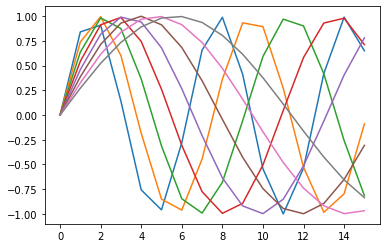

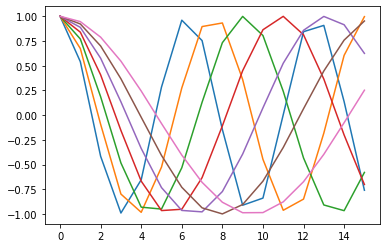

In [ ]:
"""

class PositionalEncoding(torch.nn.Module):


à vous de compléter cette cellule


"""

"""
on vérifie que tout est OK 
"""
embedding_size = 100
pe = PositionalEncoding(embedding_size)
X = torch.zeros(1,seq_len,embedding_size)
Xe = pe(X)

import matplotlib.pyplot as plt

for i in range (0,15,2):
  plt.plot(Xe[0,:,i])

plt.figure()
for i in range (1,15,2):
  plt.plot(Xe[0,:,i])

### 5ᵉ étape : construction du modèle à base de transformers

Vous construirez ensuite le modèle de transformer qui permet de faire la traduction de chaines de *caractères*

In [ ]:
class mymodel(torch.nn.Module):

"""

à vous de compléter cette cellule

"""


### 6eme étape : entrainement du modèle

Vous pourrez, par exemple, représenter les caractères par un embedding de taille 20.

In [ ]:

embedding_size=20
learning_rate = 1e-3
model = mymodel()
model.training = True
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)   

NUM_EPOCH=200
 
for epoch in range(NUM_EPOCH):
 """

à vous de compléter cette cellule

"""

epoch:  0 loss:  78.85632252693176
exemple de décodage d'une donnée de train :  joe{{{{{{{{{{{{  ->  rer{{{{{{{{{{{{ <fin>
epoch:  10 loss:  34.83847886323929
exemple de décodage d'une donnée de train :  maybelle{{{{{{{  ->  lallelel{{{{{{{ <fin>
epoch:  20 loss:  12.277349293231964
exemple de décodage d'une donnée de train :  lilac{{{{{{{{{{  ->  lilad{{{{{{{{{{ <fin>
epoch:  30 loss:  6.542310491204262
exemple de décodage d'une donnée de train :  sylvianne{{{{{{  ->  syluianme{{{{{{ <fin>
epoch:  40 loss:  4.330849878489971
exemple de décodage d'une donnée de train :  pen{{{{{{{{{{{{  ->  pens{{{{{{{{{{{ <fin>
epoch:  50 loss:  3.522855445742607
exemple de décodage d'une donnée de train :  lazare{{{{{{{{{  ->  lazare{{{{{{{{{ <fin>
epoch:  60 loss:  3.007514949887991
exemple de décodage d'une donnée de train :  jeff{{{{{{{{{{{  ->  jedf{{{{{{{{{{{ <fin>
epoch:  70 loss:  2.531239742413163
exemple de décodage d'une donnée de train :  belinda{{{{{{{{  ->  belinda{{{{{{{{ <fin>


### 7eme étape : décodage du jeu de test

Le décodage se fera lettre par lettre.

In [ ]:
model.training = False
for x_src, x_tgt in test_loader:
  
 """

à vous de compléter cette cellule

"""

décodage de [ .udqkrjijklmnopq ]
   -> .l
   -> .la
   -> .lar
   -> .lara
   -> .larai
   -> .larain
   -> .laraine
   -> .laraine{
   -> .laraine{{
   -> .laraine{{{
   -> .laraine{{{{
   -> .laraine{{{{{
   -> .laraine{{{{{{
   -> .laraine{{{{{{{
   -> .laraine{{{{{{{{
   -> .laraine{{{{{{{{{
   GT : [ .laraine{{{{{{{{ ]
